In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_242"; OpenJDK Runtime Environment (build 1.8.0_242-8u242-b08-1~deb9u1-b08); OpenJDK 64-Bit Server VM (build 25.242-b08, mixed mode)
  Starting server from /opt/conda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpztt_l92l
  JVM stdout: /tmp/tmpztt_l92l/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpztt_l92l/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.4
H2O cluster version age:,"28 days, 19 hours and 53 minutes"
H2O cluster name:,H2O_from_python_unknownUser_vll8pl
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [2]:
### download the data
train_file = "https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/train.csv.gz"
test_file  =  "https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/test.csv.gz"

In [3]:
train = h2o.import_file(train_file)
test = h2o.import_file(test_file)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
pdf = train.as_data_frame()

In [7]:
Xpd = pdf.drop('C785',axis=1)
ypd = pdf[['C785']]

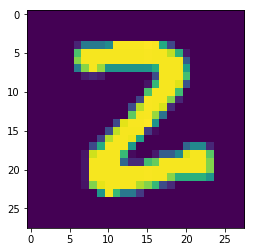

In [15]:
import matplotlib.pyplot as plt

plt.imshow(Xpd.values[0].reshape(28,28))

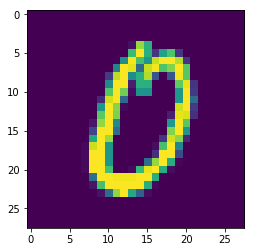

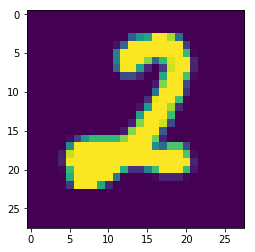

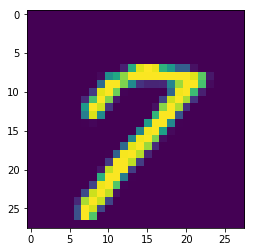

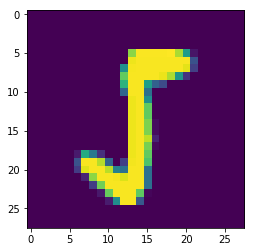

In [17]:
plt.imshow(Xpd.values[3].reshape(28,28))
plt.show()
plt.imshow(Xpd.values[4].reshape(28,28))
plt.show()
plt.imshow(Xpd.values[5].reshape(28,28))
plt.show()
plt.imshow(Xpd.values[6].reshape(28,28))
plt.show()

In [18]:
type(train)

h2o.frame.H2OFrame

In [19]:
type(test)

h2o.frame.H2OFrame

In [20]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [24]:
dl1 = H2ODeepLearningEstimator(epochs=2)

In [25]:
fm = train.col_names
response = "C785"
fm.remove(response)

## you must make the target column as.factor() otherwise it will be regression

In [35]:
train[response] = train[response].asfactor()

In [36]:
test[response] = test[response].asfactor()

In [37]:
dl1.train(fm,response,train,)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [38]:
dl1.model_performance(test)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.03568361575739268
RMSE: 0.18890107399745687
LogLoss: 0.23987766742235375
Mean Per-Class Error: 0.042141920068053645

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,6,7,8,9,Error,Rate
0,967.0,0.0,2.0,0.0,0.0,9.0,0.0,1.0,1.0,0.0,0.013265,13 / 980
1,2.0,1120.0,4.0,1.0,0.0,1.0,5.0,1.0,1.0,0.0,0.013216,"15 / 1,135"
2,7.0,2.0,988.0,4.0,1.0,3.0,6.0,9.0,12.0,0.0,0.042636,"44 / 1,032"
3,1.0,0.0,7.0,959.0,0.0,21.0,0.0,9.0,7.0,6.0,0.050495,"51 / 1,010"
4,2.0,0.0,7.0,0.0,934.0,1.0,4.0,10.0,3.0,21.0,0.048880,48 / 982
5,5.0,0.0,2.0,6.0,1.0,869.0,2.0,3.0,2.0,2.0,0.025785,23 / 892
6,12.0,2.0,4.0,1.0,5.0,38.0,892.0,2.0,2.0,0.0,0.068894,66 / 958
7,2.0,4.0,12.0,2.0,0.0,0.0,0.0,998.0,3.0,7.0,0.029183,"30 / 1,028"
8,7.0,1.0,7.0,5.0,2.0,28.0,2.0,4.0,912.0,6.0,0.063655,62 / 974
9,3.0,5.0,0.0,7.0,11.0,12.0,1.0,22.0,5.0,943.0,0.065411,"66 / 1,009"



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.9582
1,2,0.9872
2,3,0.9938
3,4,0.9975
4,5,0.9988
5,6,0.9994
6,7,0.9998
7,8,0.9999
8,9,1.0000
9,10,1.0000


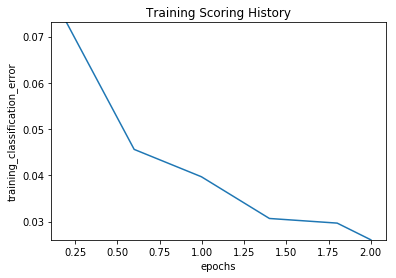

In [39]:
dl1.plot()

In [40]:
dl1.predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
8,7.85037e-13,4.41503e-10,1.9848e-12,5.11484e-08,6.43669e-13,1.19356e-11,1.00935e-14,1.44913e-11,1,1.68249e-10
3,2.46553e-15,1.19355e-10,1.33775e-11,0.999999,2.14756e-12,6.55237e-07,1.29367e-16,3.03648e-08,3.71133e-09,1.45738e-08
8,0.000525128,5.48038e-13,6.22211e-08,2.58985e-12,1.66617e-14,4.05263e-05,9.16743e-09,3.03406e-15,0.999434,8.24712e-08
0,1,7.62611e-21,2.10647e-10,1.24062e-16,3.05866e-13,6.46919e-11,3.82971e-11,4.16747e-15,1.80163e-13,1.2826e-10
1,8.29231e-10,0.999995,1.51906e-06,1.60079e-11,2.5859e-07,8.70345e-08,2.82483e-08,1.16723e-06,2.30658e-06,1.77663e-10
5,2.82389e-08,1.53614e-12,3.60129e-18,1.68647e-18,5.17705e-13,1,1.11392e-12,1.91489e-12,7.58598e-11,1.77788e-16
0,1,1.56859e-25,3.79554e-17,4.36513e-20,2.59522e-27,1.05226e-10,7.05955e-18,4.24707e-17,6.17061e-21,3.00659e-11
1,8.74086e-12,0.993712,8.12555e-07,5.95786e-08,8.39395e-08,9.38817e-11,7.88029e-10,0.00628745,4.80683e-08,1.3928e-09
5,1.5323e-12,6.06359e-07,1.27336e-08,0.000457423,1.63402e-07,0.999519,1.98882e-10,7.61311e-13,2.26177e-05,3.5577e-07
2,1.09182e-06,2.51518e-06,0.984342,1.58995e-05,5.23198e-09,1.43624e-05,3.42527e-05,3.21918e-05,0.0155577,1.18054e-07


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200,C201,C202,C203,C204,C205,C206,C207,C208,C209,C210,C211,C212,C213,C214,C215,C216,C217,C218,C219,C220,C221,C222,C223,C224,C225,C226,C227,C228,C229,C230,C231,C232,C233,C234,C235,C236,C237,C238,C239,C240,C241,C242,C243,C244,C245,C246,C247,C248,C249,C250,C251,C252,C253,C254,C255,C256,C257,C258,C259,C260,C261,C262,C263,C264,C265,C266,C267,C268,C269,C270,C271,C272,C273,C274,C275,C276,C277,C278,C279,C280,C281,C282,C283,C284,C285,C286,C287,C288,C289,C290,C291,C292,C293,C294,C295,C296,C297,C298,C299,C300,C301,C302,C303,C304,C305,C306,C307,C308,C309,C310,C311,C312,C313,C314,C315,C316,C317,C318,C319,C320,C321,C322,C323,C324,C325,C326,C327,C328,C329,C330,C331,C332,C333,C334,C335,C336,C337,C338,C339,C340,C341,C342,C343,C344,C345,C346,C347,C348,C349,C350,C351,C352,C353,C354,C355,C356,C357,C358,C359,C360,C361,C362,C363,C364,C365,C366,C367,C368,C369,C370,C371,C372,C373,C374,C375,C376,C377,C378,C379,C380,C381,C382,C383,C384,C385,C386,C387,C388,C389,C390,C391,C392,C393,C394,C395,C396,C397,C398,C399,C400,C401,C402,C403,C404,C405,C406,C407,C408,C409,C410,C411,C412,C413,C414,C415,C416,C417,C418,C419,C420,C421,C422,C423,C424,C425,C426,C427,C428,C429,C430,C431,C432,C433,C434,C435,C436,C437,C438,C439,C440,C441,C442,C443,C444,C445,C446,C447,C448,C449,C450,C451,C452,C453,C454,C455,C456,C457,C458,C459,C460,C461,C462,C463,C464,C465,C466,C467,C468,C469,C470,C471,C472,C473,C474,C475,C476,C477,C478,C479,C480,C481,C482,C483,C484,C485,C486,C487,C488,C489,C490,C491,C492,C493,C494,C495,C496,C497,C498,C499,C500,C501,C502,C503,C504,C505,C506,C507,C508,C509,C510,C511,C512,C513,C514,C515,C516,C517,C518,C519,C520,C521,C522,C523,C524,C525,C526,C527,C528,C529,C530,C531,C532,C533,C534,C535,C536,C537,C538,C539,C540,C541,C542,C543,C544,C545,C546,C547,C548,C549,C550,C551,C552,C553,C554,C555,C556,C557,C558,C559,C560,C561,C562,C563,C564,C565,C566,C567,C568,C569,C570,C571,C572,C573,C574,C575,C576,C577,C578,C579,C580,C581,C582,C583,C584,C585,C586,C587,C588,C589,C590,C591,C592,C593,C594,C595,C596,C597,C598,C599,C600,C601,C602,C603,C604,C605,C606,C607,C608,C609,C610,C611,C612,C613,C614,C615,C616,C617,C618,C619,C620,C621,C622,C623,C624,C625,C626,C627,C628,C629,C630,C631,C632,C633,C634,C635,C636,C637,C638,C639,C640,C641,C642,C643,C644,C645,C646,C647,C648,C649,C650,C651,C652,C653,C654,C655,C656,C657,C658,C659,C660,C661,C662,C663,C664,C665,C666,C667,C668,C669,C670,C671,C672,C673,C674,C675,C676,C677,C678,C679,C680,C681,C682,C683,C684,C685,C686,C687,C688,C689,C690,C691,C692,C693,C694,C695,C696,C697,C698,C699,C700,C701,C702,C703,C704,C705,C706,C707,C708,C709,C710,C711,C712,C713,C714,C715,C716,C717,C718,C719,C720,C721,C722,C723,C724,C725,C726,C727,C728,C729,C730,C731,C732,C733,C734,C735,C736,C737,C738,C739,C740,C741,C742,C743,C744,C745,C746,C747,C748,C749,C750,C751,C752,C753,C754,C755,C756,C757,C758,C759,C760,C761,C762,C763,C764,C765,C766,C767,C768,C769,C770,C771,C772,C773,C774,C775,C776,C777,C778,C779,C780,C781,C782,C783,C784,C785
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [52]:
dl1.predict(test[0,:])

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
8,7.85037e-13,4.41503e-10,1.9848e-12,5.11484e-08,6.43669e-13,1.19356e-11,1.00935e-14,1.44913e-11,1,1.68249e-10


In [55]:
dl1.predict(train[0,:])

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
2,3.98741e-16,6.50321e-15,0.999993,6.88689e-06,5.71684e-30,1.34164e-17,3.69133e-23,1.76372e-21,5.77593e-11,3.10452e-24


In [ ]:
plt.imshow(Xpd.values[3].reshape(28,28))
plt.show()
print(dl1.predict(train[3,:]))
plt.imshow(Xpd.values[4].reshape(28,28))
plt.show()
print(dl1.predict(train[4,:]))
plt.imshow(Xpd.values[5].reshape(28,28))
plt.show()
print(dl1.predict(train[5,:]))
plt.imshow(Xpd.values[6].reshape(28,28))
plt.show()
print(dl1.predict(train[6,:]))